<a href="https://colab.research.google.com/github/Himanshu-1703/Ensemble-learning/blob/main/AdaBoost/My_Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.6 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

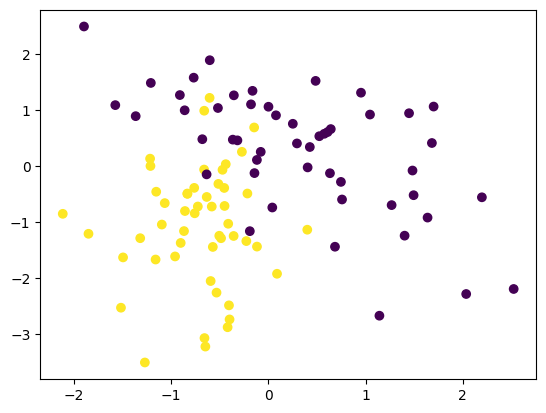

In [67]:
# generate the data

from sklearn.datasets import make_classification

X,y = make_classification(n_samples=100,n_features=2,n_informative=2,
                          n_redundant=0,n_clusters_per_class=1,
                          hypercube=False,class_sep=1,random_state=930)

# plot x and y

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [49]:
# do the train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=78)

X_train.shape, X_test.shape

((80, 2), (20, 2))

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
# create a decision tree classifier to the maximum depth

dt = DecisionTreeClassifier()

# fir the decision tree
dt.fit(X_train,y_train)

# do predictions on train data
y_pred_train = dt.predict(X_train)

# do predictions on the test data
y_pred_test = dt.predict(X_test)

# calculate the accuracy score
train_acc = accuracy_score(y_train,y_pred_train) 
test_acc = accuracy_score(y_test,y_pred_test) 

print('The train accuracy is',train_acc)
print('The test accuracy is',test_acc)

The train accuracy is 1.0
The test accuracy is 0.95


The train accuracy is more than that of test accuracy which is a clear sign of **overfitting**.

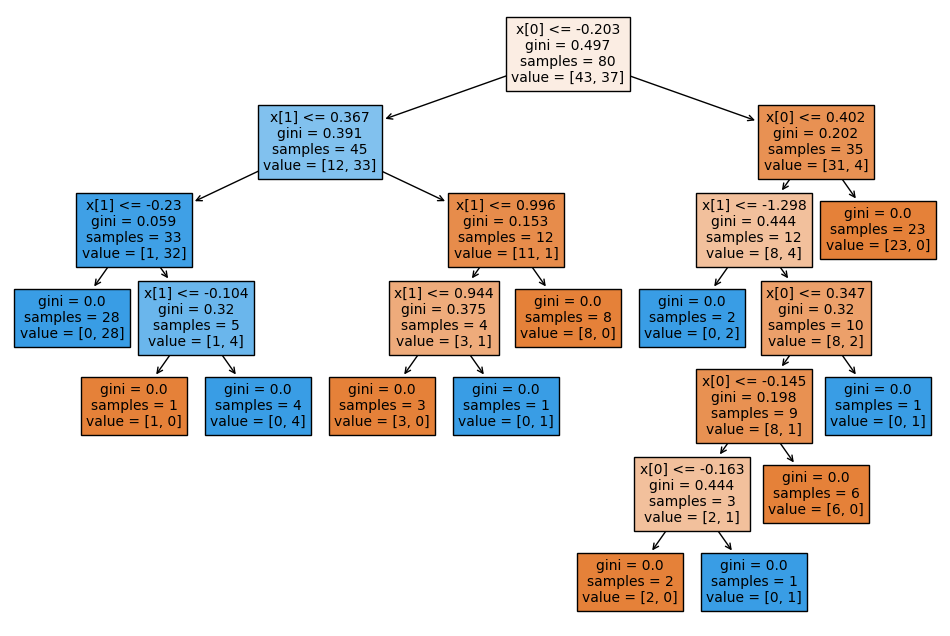

In [10]:
# visualize the tree

from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(dt,filled=True)
plt.show()

- A fully grown decision tree has all the leaf nodes as pure splits.

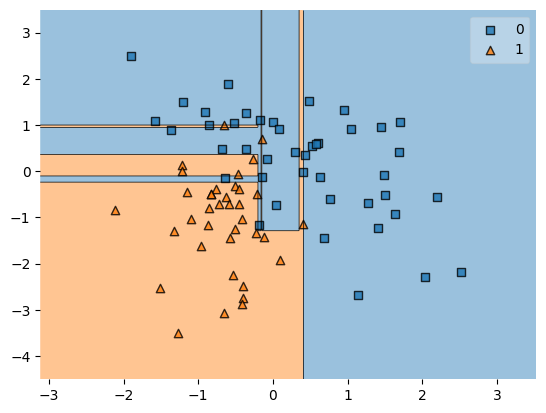

In [11]:
# plot the decision regions for the train data

plot_decision_regions(X_train,y_train,clf=dt)
plt.show()

The decision tree classifier is picking up very minute patterns from the data also and is trying to classify the noisy points correctly which is leading the model to overfit.

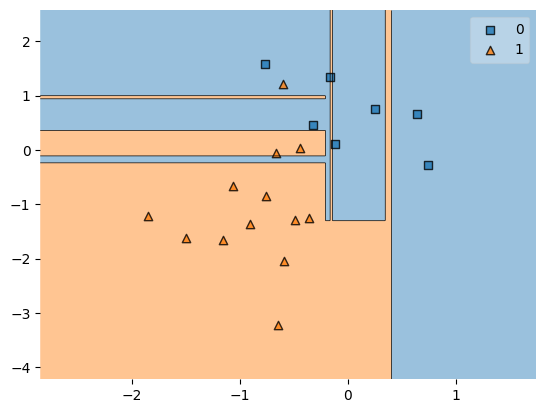

In [12]:
# plot the decision regions for the test data

plot_decision_regions(X_test,y_test,clf=dt)
plt.show()

But what if we had a weak decision tree which can only grow for a depth of 1.    
How would this model perform?

In [13]:
# create a decision tree classifier to the maximum depth of 1

dt = DecisionTreeClassifier(max_depth=1)

# fir the decision tree
dt.fit(X_train,y_train)

# do predictions on train data
y_pred_train = dt.predict(X_train)

# do predictions on the test data
y_pred_test = dt.predict(X_test)

# calculate the accuracy score
train_acc = accuracy_score(y_train,y_pred_train) 
test_acc = accuracy_score(y_test,y_pred_test) 

print('The train accuracy is',train_acc)
print('The test accuracy is',test_acc)

The train accuracy is 0.8
The test accuracy is 0.9


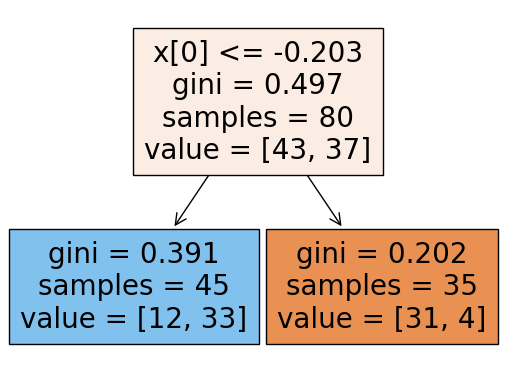

In [14]:
# visualize the tree

from sklearn.tree import plot_tree

plot_tree(dt,filled=True)
plt.show()

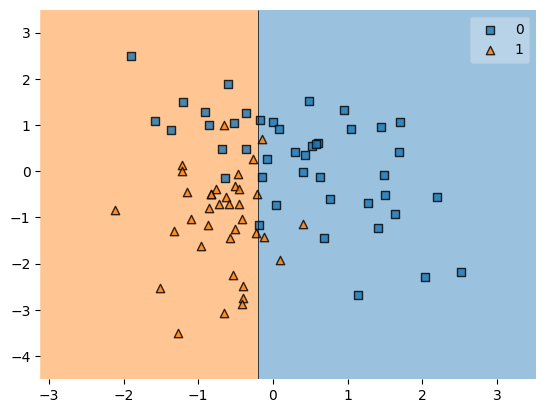

In [15]:
# plot the decision regions for the train data

plot_decision_regions(X_train,y_train,clf=dt)
plt.show()

Because the model is allowed to grow for a depth of only one tree now we can clearly see that the model is able to perform only a single split in the data and the model performance is not very good.

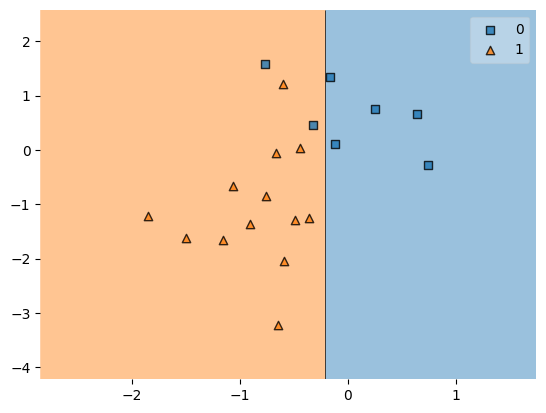

In [16]:
# plot the decision regions for the test data

plot_decision_regions(X_test,y_test,clf=dt)
plt.show()

## Adaboost:

Adaboost is a kind of an Ensemble technique which works sequentially and adopts multiple weak learners.

The weak learners in Adaboost are nothing but Decision Trees with max depth of 1 and they are called as **Decision Stumps**.    

These Decision stumps are sequentially connected to each other and passes on the mistakes from one model to another. The next model in the line tries to classify the data points correctly and it's own misclassified points are sent to the next model for classification.  

Through this approach the strength of the weak learners are combined together to come up with a solution better than if the model was used as it is.

Boosting algorithms comes handy when the base estimator is **underfitting** on the dataset and is not able to understand the underlying patterns of the data.

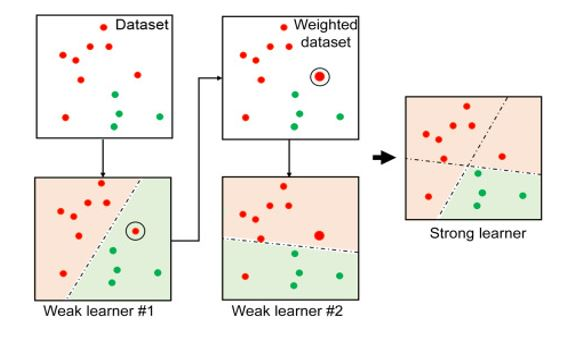

##### Step 1: 

Assign equal weights to all the data points

In [50]:
# covert X_train to dataframe and y_train to series

X_train = pd.DataFrame(X_train,columns=['X1','X2'])
y_train = pd.Series(y_train,name='target')

In [18]:
def assign_weights(X_train):
    X_train['weights'] = 1/X_train.shape[0]
    return X_train

assign_weights(X_train)

,X1,X2,weights
0,-1.516151,-2.527740,0.0125
1,-1.153721,-0.455136,0.0125
2,0.293664,0.407741,0.0125
3,2.522484,-2.193069,0.0125
4,-0.117398,-1.435673,0.0125
...,...,...,...
75,-0.365914,0.475648,0.0125
76,-1.318155,-1.285583,0.0125
77,0.403609,-0.020624,0.0125
78,-0.272496,0.257522,0.0125


##### Step 2:
Train a decision tree stump on the input data and calculate the predictions.

In [19]:
# create the decision tree stump
m1 = DecisionTreeClassifier(max_depth=1)

# fit the decision tree stump
m1.fit(X_train[['X1','X2']],y_train)

# predict on the stump
y_pred = m1.predict(X_train[['X1','X2']])

X_train['y_pred'] = y_pred


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


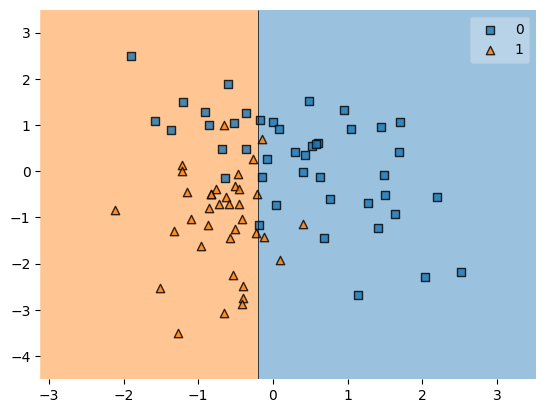

In [20]:
# visulaize the decision bundary of the stump

plot_decision_regions(X_train[['X1','X2']].values,y_train.values,clf=m1)
plt.show()

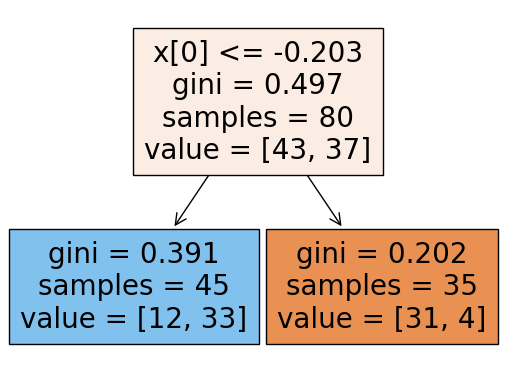

In [21]:
# decision stump tree vis

plot_tree(decision_tree=m1,filled=True)
plt.show()

In [22]:
X_train

,X1,X2,weights,y_pred
0,-1.516151,-2.527740,0.0125,1
1,-1.153721,-0.455136,0.0125,1
2,0.293664,0.407741,0.0125,0
3,2.522484,-2.193069,0.0125,0
4,-0.117398,-1.435673,0.0125,0
...,...,...,...,...
75,-0.365914,0.475648,0.0125,1
76,-1.318155,-1.285583,0.0125,1
77,0.403609,-0.020624,0.0125,0
78,-0.272496,0.257522,0.0125,1


##### Step 3:
Compare the Decision tree stump predictions from the actual y and calculate the total errors in terms of weights.

In [23]:
np.sum(abs(y_train - X_train['y_pred'])) * 0.0125

0.2

In [24]:
# calculate the total_errors

def cal_total_errors(X_train,y_train):
    difference = np.sum(abs(y_train - X_train['y_pred']))
    return difference * X_train['weights'][0]

total_errors = cal_total_errors(X_train,y_train)

##### Step 5:
**Calculate the performance of the stump**    
The performance metric of the Decision stump is calculated which shows ho the model performs and how much misclassification the model makes.   
The performance say of the model is used in the final prediction of the output as well.

- The model with more performance say have a greater share in the prediction of output.
- Performance of the model is directly proportional to correct classifications.
- The model that has weak performance passes its misclassified points to the next weak learner so that the next weak learner avoids the mistakes done by the previous model.   

In [26]:
# calculate the performance of the stump

def calculate_perf(total_errors):
    perf_say = 0.5 * np.log((1-total_errors)/(total_errors + 0.00000001))
    return perf_say

alpha_1 = calculate_perf(total_errors)
alpha_1

0.693147155559946

##### Step 6:
**Update the Weights**

- The misclassified point's weights are upsampled so that the points can be passed on to the next model to have them correctly classified.
- The correctly classified points are not sent that much to the next weak learner so that's why their weights are downsampled. 

In [27]:
# create the errors column in X_train

X_train['y_true'] = y_train
X_train['errors'] = abs(X_train['y_pred'] - X_train['y_true'])

X_train

,X1,X2,weights,y_pred,y_true,errors
0,-1.516151,-2.527740,0.0125,1,1,0
1,-1.153721,-0.455136,0.0125,1,1,0
2,0.293664,0.407741,0.0125,0,0,0
3,2.522484,-2.193069,0.0125,0,0,0
4,-0.117398,-1.435673,0.0125,0,1,1
...,...,...,...,...,...,...
75,-0.365914,0.475648,0.0125,1,0,1
76,-1.318155,-1.285583,0.0125,1,1,0
77,0.403609,-0.020624,0.0125,0,0,0
78,-0.272496,0.257522,0.0125,1,1,0


In [28]:
def update_weights(row,alpha):
    if row['errors'] == 0:
        w_new_corr = row['weights'] * np.exp(-alpha)
        return w_new_corr
    
    elif row['errors'] == 1:
        w_new_incorr = row['weights'] * np.exp(alpha)
        return w_new_incorr


X_train['updated_weights'] = X_train.apply(func=update_weights,axis=1,args=(alpha_1,))

X_train

,X1,X2,weights,y_pred,y_true,errors,updated_weights
0,-1.516151,-2.527740,0.0125,1,1,0,0.00625
1,-1.153721,-0.455136,0.0125,1,1,0,0.00625
2,0.293664,0.407741,0.0125,0,0,0,0.00625
3,2.522484,-2.193069,0.0125,0,0,0,0.00625
4,-0.117398,-1.435673,0.0125,0,1,1,0.02500
...,...,...,...,...,...,...,...
75,-0.365914,0.475648,0.0125,1,0,1,0.02500
76,-1.318155,-1.285583,0.0125,1,1,0,0.00625
77,0.403609,-0.020624,0.0125,0,0,0,0.00625
78,-0.272496,0.257522,0.0125,1,1,0,0.00625


##### Step 7:
**Normalize the weights**

In [29]:
# sum of the updated weights column

X_train['updated_weights'].sum()

0.8000000000000002

The sum of the column is not 1 and we have to normalize the weights to make the sum equal to 1.

In [30]:
# normalize the weights

def weight_norm(X_train):
    X_train['updated_weights'] = X_train['updated_weights']  / X_train['updated_weights'].sum()
    return X_train

In [31]:
weight_norm(X_train)

,X1,X2,weights,y_pred,y_true,errors,updated_weights
0,-1.516151,-2.527740,0.0125,1,1,0,0.007813
1,-1.153721,-0.455136,0.0125,1,1,0,0.007813
2,0.293664,0.407741,0.0125,0,0,0,0.007813
3,2.522484,-2.193069,0.0125,0,0,0,0.007813
4,-0.117398,-1.435673,0.0125,0,1,1,0.031250
...,...,...,...,...,...,...,...
75,-0.365914,0.475648,0.0125,1,0,1,0.031250
76,-1.318155,-1.285583,0.0125,1,1,0,0.007813
77,0.403609,-0.020624,0.0125,0,0,0,0.007813
78,-0.272496,0.257522,0.0125,1,1,0,0.007813


In [32]:
# sum of the updated weights column after normalization

X_train['updated_weights'].sum()

0.9999999999999999

##### Step 8:
Creates bins in the data according to the updated weights and create a new training set for the next weak learner where the errors data points are upsampled and represented more.    

In the new dataset the representation of the correctly classified points should be less.

In [33]:
# create bins in the new data

X_train['upper_bin'] = X_train['updated_weights'].cumsum()
X_train['lower_bin'] = X_train['upper_bin'] - X_train['updated_weights']

X_train

,X1,X2,weights,y_pred,y_true,errors,updated_weights,upper_bin,lower_bin
0,-1.516151,-2.527740,0.0125,1,1,0,0.007813,0.007813,0.000000
1,-1.153721,-0.455136,0.0125,1,1,0,0.007813,0.015625,0.007813
2,0.293664,0.407741,0.0125,0,0,0,0.007813,0.023438,0.015625
3,2.522484,-2.193069,0.0125,0,0,0,0.007813,0.031250,0.023438
4,-0.117398,-1.435673,0.0125,0,1,1,0.031250,0.062500,0.031250
...,...,...,...,...,...,...,...,...,...
75,-0.365914,0.475648,0.0125,1,0,1,0.031250,0.968750,0.937500
76,-1.318155,-1.285583,0.0125,1,1,0,0.007813,0.976562,0.968750
77,0.403609,-0.020624,0.0125,0,0,0,0.007813,0.984375,0.976562
78,-0.272496,0.257522,0.0125,1,1,0,0.007813,0.992187,0.984375


In [34]:
# create new dataset

def create_data(X_train):
    new_df = pd.DataFrame()

    for i in range(0,X_train.shape[0]):
        rand_num = np.random.random()
        row = X_train[(rand_num >= X_train['lower_bin']) & (rand_num <= X_train['upper_bin'])]
        row = row[['X1','X2','y_true']]
        new_df = pd.concat([new_df,row],axis=0,ignore_index=True)
    
    
    return new_df



new_df = create_data(X_train)
new_df.head(20)

,X1,X2,y_true
0,-0.117398,-1.435673,1
1,-0.518954,1.040903,0
2,0.399933,-1.134014,1
3,-1.516151,-2.527740,1
4,-0.178826,1.106129,0
5,-0.860940,0.999932,0
6,1.267274,-0.694290,0
7,-0.272496,0.257522,1
8,-0.365914,0.475648,0
9,-0.272496,0.257522,1


In [51]:
# create the dataset for each decision stump model

dt1 = DecisionTreeClassifier(max_depth=1)
dt2 = DecisionTreeClassifier(max_depth=1)
dt3 = DecisionTreeClassifier(max_depth=1)

In [45]:
def get_df(X_train,y_train,dt):
    
    # fit the model
    dt.fit(X_train[['X1','X2']],y_train)

    # get the predictions
    y_pred = dt.predict(X_train)

    # add the y_pred and the errors into the data
    X_train['y_pred'] = y_pred
    X_train['y_true'] = y_train
    X_train['errors'] = abs(X_train['y_pred'] - X_train['y_true'])

    # add the weights column
    assign_weights(X_train)

    # calculate the total_errors:
    errors = cal_total_errors(X_train,y_train)

    # calculate the performance of the stump
    alpha = calculate_perf(errors)

    # update the weights
    X_train['updated_weights'] = X_train.apply(func=update_weights,axis=1,args=(alpha_1,))

    # normalize the weights
    weight_norm(X_train)

    # create bins
    X_train['upper_bin'] = X_train['updated_weights'].cumsum()
    X_train['lower_bin'] = X_train['upper_bin'] - X_train['updated_weights']    

    # create new df
    df = create_data(X_train)

    # create X and y
    X = df.drop(columns=['y_true'])
    y = df['y_true']

    return X,y,alpha

In [52]:
# train the first decision tree

X1,y1,alpha1 = get_df(X_train,y_train,dt1)

# train the second decision tree
X2,y2,alpha2 = get_df(X1,y1,dt2)

# train the third decision tree
X3,y3,alpha3 = get_df(X2,y2,dt3)

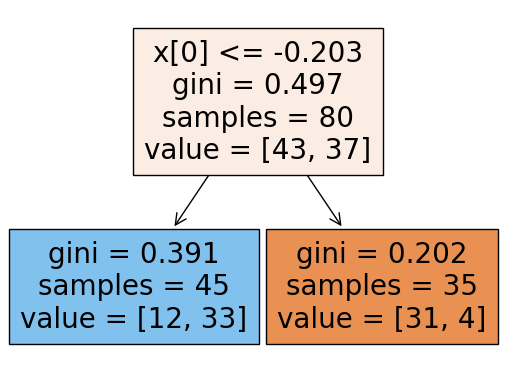

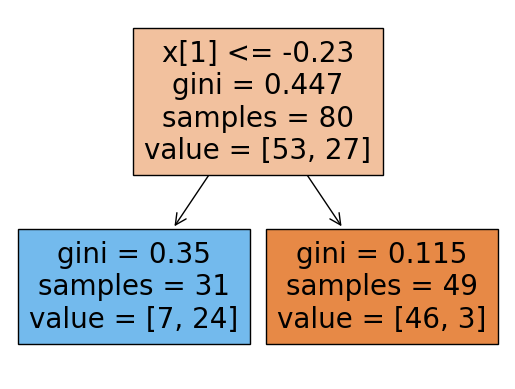

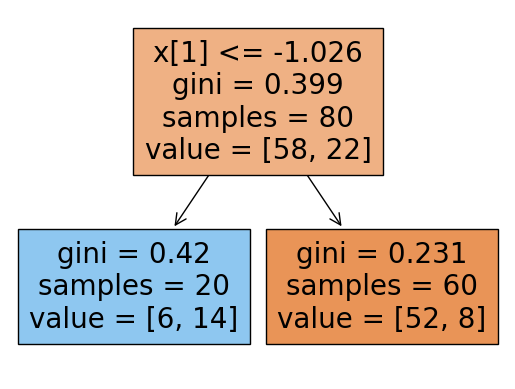

In [56]:
# plot the decision trees

dt_list = [dt1,dt2,dt3]

for dt_est in dt_list:
    plot_tree(dt_est,filled=True)
    plt.show()

In [54]:
# the performace say of decision stumps is
alpha_list = [alpha1,alpha2,alpha3]
i = 1
for a in alpha_list:
    print(f'The alpha value of decision stump {i} is ',a)
    i += 1

The alpha value of decision stump 1 is  0.693147155559946
The alpha value of decision stump 2 is  0.9729550345276583
The alpha value of decision stump 3 is  0.7752986776341556


In [71]:
# final prediction of a query point

rand_num = np.random.randint(low=0,high=X.shape[0])

x_sample  = X[rand_num]
y_sample = y[rand_num]

In [72]:
x_sample , y_sample

(array([-0.63417528, -0.54878946]), 1)

In [76]:
# predict the point using all decision trees

pred_list = []
for dt in dt_list:
    print(dt.predict(x_sample.reshape(-1,2)))
    pred_list.append(dt.predict(x_sample.reshape(-1,2)))

[1]
[1]
[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does 

- In the case of positive prediction we take the prediction as +1.
- In the case of prediction for the negative class we take the prediction as -1.

In [77]:
# predict the final output

y_pred_final = 1 * alpha1 + 1 * alpha2 + -1 * alpha3
y_pred_final 

0.8908035124534487

In [78]:
# take the sign of the total prediction to get the true class prediction

np.sign(y_pred_final)

1.0